# **Plotting with Plotly Express**

![plotly1](images/plotly1.png)



# Plotly Express

* Plotly Express is a package similar to hvPlot and offerrs many of the same plots (bar, line, scatter, etc.) as well as parallel coordinates and parallel categories plots.
* It is a favourite amongst data science and web-based data visualization communities
* It is a leader in data visualization, and supports multiple programming languages, like Python, JavaScript and R
* Plotly Express offers **advanced stats and financial charts** that are lacking in other technologies like hvPlot, Matplotlib and Pandas


![plotly2](images/plotly2.png)

Sample visualizations made with Plotly Express include:
* [scatter and line plots](https://plotly.com/python/plotly-express/#scatter-line-area-and-bar-charts)
* [distributions](https://plotly.com/python/plotly-express/#distributions)
* [ternary visualisations](https://plotly.com/python/plotly-express/#ternary-coordinates)
* [maps](https://plotly.com/python/plotly-express/#maps)




## Plotly Express demo

* Plotly Express gives users a simple `plot` based interface that allows develoeprs to create and customize interactive visualizations

![plotly3](images/plotly3.png)

* Plotly Express is packaged and powered by the Plotly library, an open source graphing library for Python.
* In addition to the chart types we’ve seen (scatter, line, and bar), Plotly Express includes charting types like parallel coordinates and parallel categories. 
    * These plot types are useful when visualizing correlations and the relationships between data points

## Instructor Demo: Plotly Express

In [8]:
import plotly.express as px
import pandas as pd
from pathlib import Path

In [9]:
# Read in data
md_housing_sales = pd.read_csv(Path('activities/2/01-Ins_Plotly_Exp_Demo/Resources/maryland_sales_data.csv'))
md_housing_sales.head()

County  Cost of Living Index  Average Sale Price  \
0      Allegany County                  84.9              105707   
1  Anne Arundel County                 119.6              400107   
2       Baltimore City                 101.3              173413   
3     Baltimore County                 109.9              281797   
4       Calvert County                 121.7              348891   

   Median Sale Price  Number of Housing Units Sold  
0              90829                           624  
1             338287                          8619  
2             139723                          8450  
3             238426                          9986  
4             318471                          1576

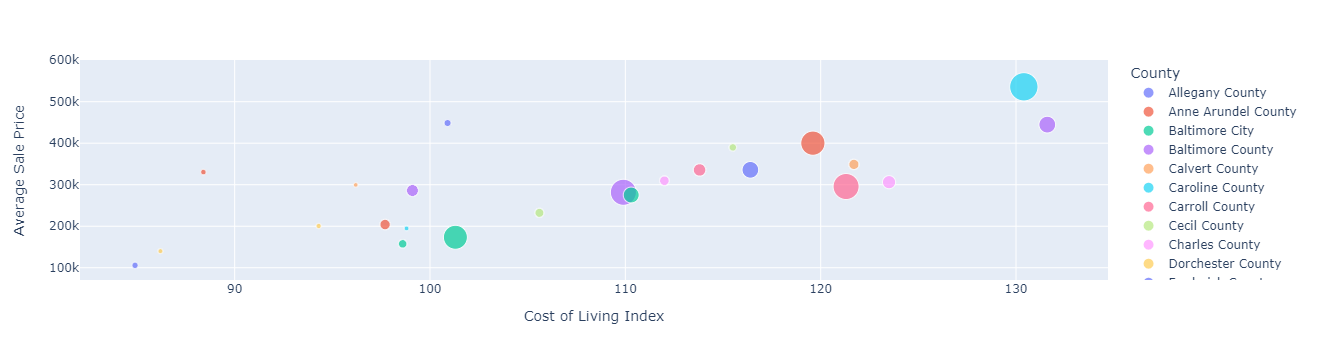

In [10]:
# Create scatter plot comparing average sale price and cost of living index
px.scatter(
    md_housing_sales,
    x="Cost of Living Index",
    y="Average Sale Price",
    size="Number of Housing Units Sold",
    color="County",
)

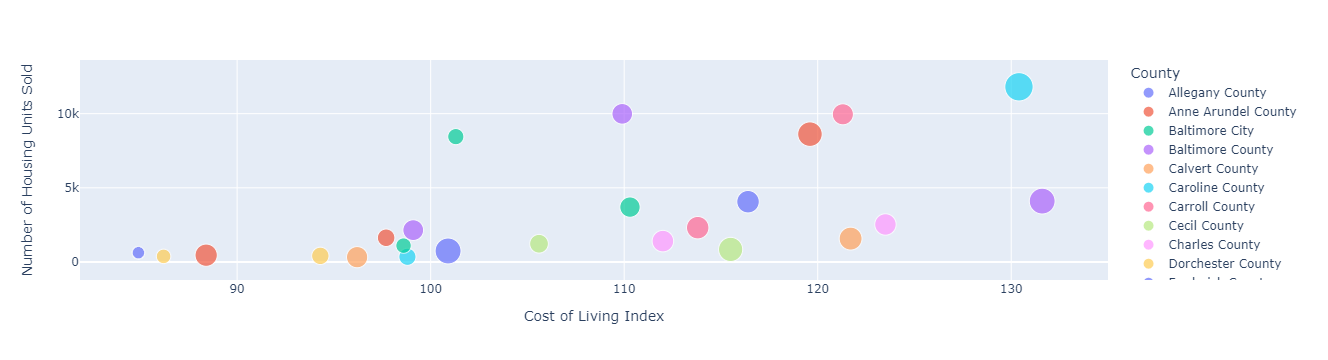

In [4]:
# Create scatter plot comparing number of housing units sold with cost of living index
px.scatter(
    md_housing_sales,
    x="Cost of Living Index",
    y="Number of Housing Units Sold",
    size="Average Sale Price",
    color="County",
)

## Student Activity: Plotting with Plotly

For the second round of interviews, REMAX is requesting that applicants create interactive plots using Plotly Express instead of hvPlot. Create two scatter plots using the provided foreclosure data.

In [12]:
import plotly.express as px
import pandas as pd
from pathlib import Path

### Plot Foreclosures

In [22]:
# Read in data
foreclosures = pd.read_csv(
    Path("activities/2/02-Stu_Plotting_w_Plotly/Resources/alleghany_foreclosures.csv"),
    infer_datetime_format=True,
    parse_dates=True,
    index_col="filing_date",
)

# Slice data and group
foreclosures_grp = (
    foreclosures[["municipality", "amount"]]
    .groupby([foreclosures.index.year, "municipality"])
    .count()
    .reset_index()
)

foreclosures_grp.head()

filing_date      municipality  amount
0         2009   Aleppo Township       5
1         2009    Aspinwall Boro       4
2         2009       Avalon Boro      22
3         2009      Baldwin Boro      47
4         2009  Baldwin Township      11

#### Plot relationship between municipality and the number of foreclosures

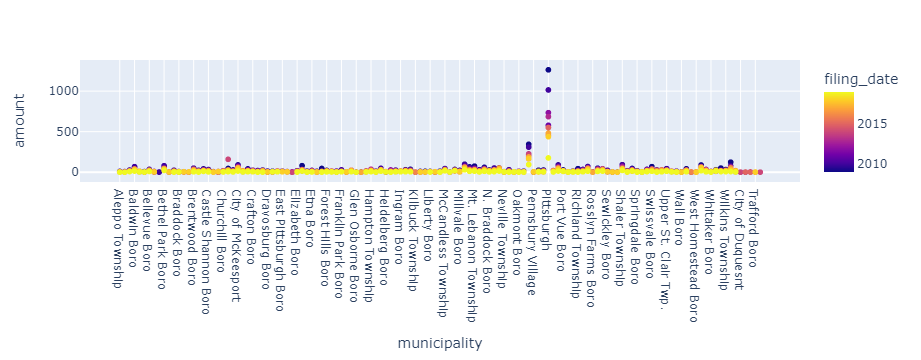

In [24]:
# Create scatter plot
px.scatter(
    foreclosures_grp,
    x = 'municipality',
    y = 'amount',
    color = 'filing_date'
)

#### Plot the relationship between filing date and municipality

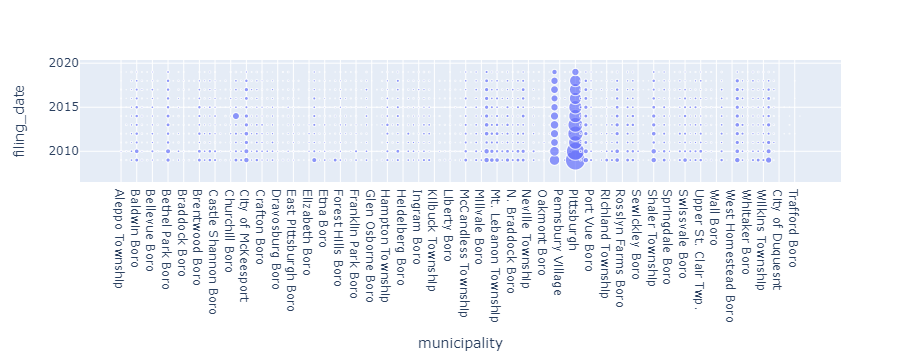

In [29]:
# Create scatter plot
px.scatter(
    foreclosures_grp,
    x = 'municipality',
    y = 'filing_date',
    size = 'amount'
)

### Challenge

#### Plot the progression of foreclosures

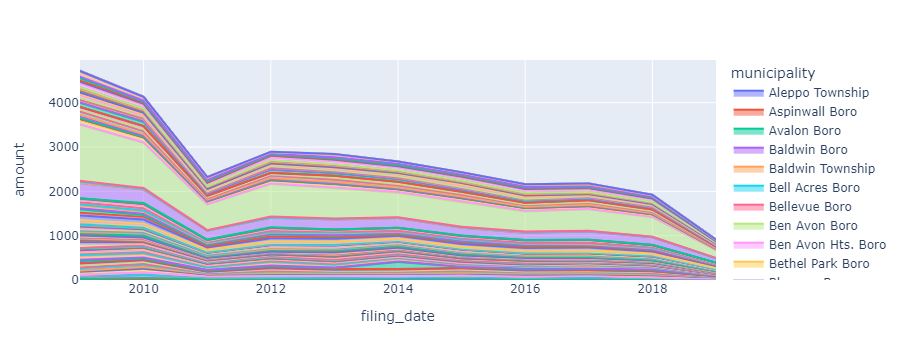

In [36]:
# Create area plot

px.area(
    foreclosures_grp,
    x = 'filing_date',
    y = 'amount',
    color = 'municipality',
    line_group = "municipality",
)


---

# Parallel Coordinate Plots

Parallel coordinate plots allow for multiple variables to be represented in parallel to one another. This is particularly valuable when tracing the relationships between variables, and how each variable relates to/affects the other.

`
import plotly.express as px
import pandas as pd
from pathlib import Path
`

`
typology = pd.read_csv(Path('../Resources/housing_market_typology.csv')) #Read in data
typology = typology.sort_values('blockGroup') # Sort values
px.parallel_coordinates(typology, color='blockGroup') # Create Parallel Coordinates plot
`

By sorting the axes and filtering values, analysts can cluster attributes to assess relationships and trends.

![parallel1](images/parallel1.png)

Sorting the columns `vacantLots` and `sales20092010` so they’re adjacent lets one see how the number of vacant lots impacts the sales for that block.

![parallel2](images/parallel2.png)



## Instructor Demo:

In [37]:
import plotly.express as px
import pandas as pd
from pathlib import Path

In [38]:
# Read in data
typology = pd.read_csv(Path("activities/2/03-Ins_Parallel_Coordinate/Resources/housing_market_typology.csv"))[:30].sort_values("blockGroup")
typology.head()

blockGroup   marketCategory  sales20092010  unitsPerSquareMile  \
4       101001  Regional Choice             79            15225.00   
8       101002  Regional Choice             69            11975.00   
9       102003  Regional Choice             67            16400.00   
24      103001  Regional Choice             54             2204.55   
2       103002  Regional Choice             87            22000.00   

    residentialPermits  vacantLots  vacantHouseNotices  foreclosureFilings  \
4                    0           0                   0                   3   
8                    1           1                   1                   5   
9                    0           0                   0                   3   
24                   0           3                   1                   4   
2                    1           0                   2                   6   

    ownerOccupied  
4            78.0  
8            69.4  
9            77.4  
24           76.6  
2            41.3

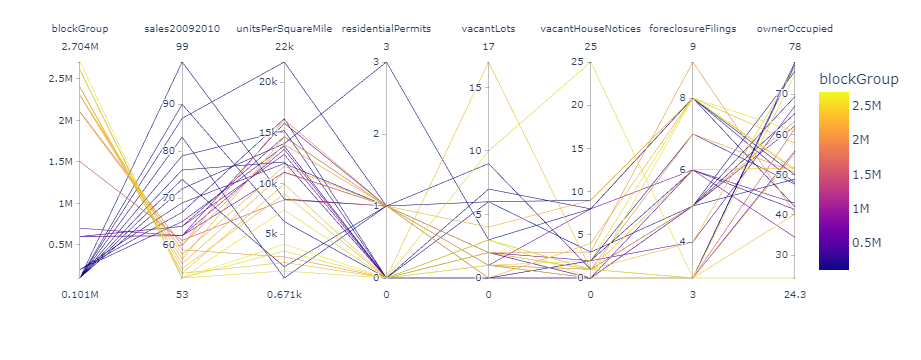

In [40]:
# Create Parallel Coordinates plot
px.parallel_coordinates(typology, color='blockGroup')

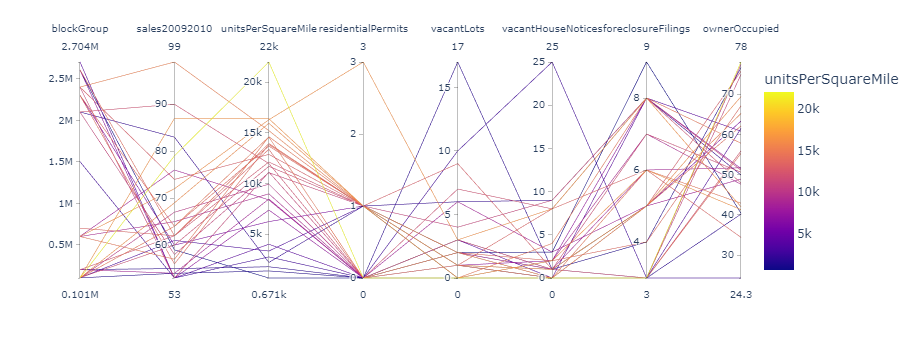

In [41]:
# Create Parallel Coordinates plot
px.parallel_coordinates(typology, color='unitsPerSquareMile')

 ##  Student Activity: Plotting with Plotly

 Put your Parallel Coordinates plotting knowledge to use by using the plot to visaulize and analyze the relationship between sales, foreclosures, and year for Allgehany County in Pennsylvania.

In [1]:
import plotly.express as px
import pandas as pd
from pathlib import Path

 ### Prep Data for Calculating Total Number of Sales and Foreclosures

In [78]:
# Read in data
sales = pd.read_csv(
    Path("activities/2/04-Stu_Parallel_Coordinates/Resources/allegheny_sales.csv"),
    infer_datetime_format=True,
    parse_dates=True,
    index_col="SALEDATE",
).dropna()

foreclosures = pd.read_csv(
    Path("activities/2/04-Stu_Parallel_Coordinates/Resources/allegheny_foreclosures.csv"),
    infer_datetime_format=True,
    parse_dates=True,
    index_col="filing_date",
).dropna()

# Slice data and get the count of instances by year
foreclosures_grp_cnt = (
    foreclosures[["amount"]].groupby([foreclosures.index.year]).count()
)
sales_grp_cnt = sales[["PRICE"]].groupby([sales.index.year]).count()

# Rename columns to be 'num_sales' and 'num_foreclosures'
sales_grp_cnt.columns = ["num_sales"]
foreclosures_grp_cnt.columns = ["num_foreclosures"]

### Concatenate Data

In [79]:
# Concatenate data
sales_foreclosures = pd.concat(
    [sales_grp_cnt, foreclosures_grp_cnt],
    axis = 1,
    join = 'inner',
)



In [80]:
sales_foreclosures = sales_foreclosures.reset_index().rename(columns = {'index':'year'})
sales_foreclosures = sales_foreclosures[['num_sales', 'year', 'num_foreclosures']]
sales_foreclosures.head(10)

num_sales  year  num_foreclosures
0         85  2012              2893
1         93  2013              2841
2         97  2014              2676
3        108  2015              2431
4        102  2016              2163
5        101  2017              2176
6         94  2018              1922
7         33  2019              1046

 ### Plot data

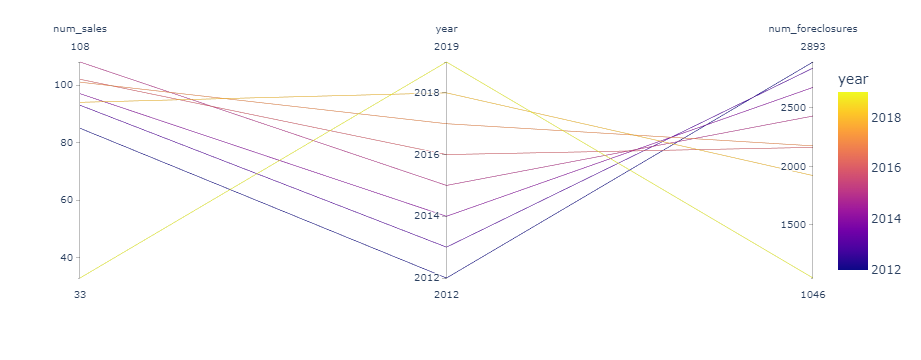

In [81]:
# Plot data using parallel_coordinates plot
px.parallel_coordinates(sales_foreclosures, color = 'year')

### Challenge

#### Prep Data for Calculating Total Amounts for Sales and Foreclosures

In [99]:
# Read in data
sales = pd.read_csv(
    Path("activities/2/04-Stu_Parallel_Coordinates/Resources/allegheny_sales.csv"),
    infer_datetime_format=True,
    parse_dates=True,
    index_col="SALEDATE",
).dropna()

foreclosures = pd.read_csv(
    Path("activities/2/04-Stu_Parallel_Coordinates/Resources/allegheny_foreclosures.csv"),
    infer_datetime_format=True,
    parse_dates=True,
    index_col="filing_date",
).dropna()

# Group data and calculate total amount in foreclosures and sales by year
amount_from_foreclosures = (
    foreclosures[["amount"]].groupby([foreclosures.index.year]).sum()
)
amount_from_sales = (
    sales[["PRICE"]].groupby([sales.index.year]).sum()
)
# Rename columns to 'amount_from_sales' and 'amount_from_foreclosures'
amount_from_foreclosures.columns = ['amount_from_foreclosures']
amount_from_sales.columns = ['amount_from_sales']


#### Concatenate Data

In [103]:
# Concatenate sums
total_amount = pd.concat(
    [amount_from_foreclosures, amount_from_sales],
    axis = 1,
    join = "inner"
)
total_amount.reset_index(inplace = True)

 #### Plot Data

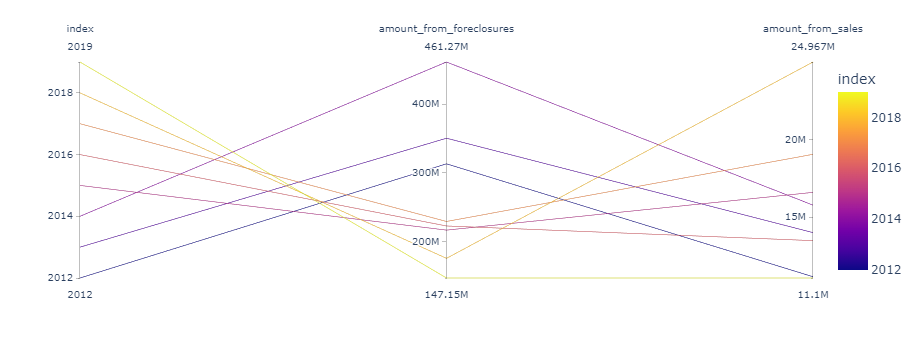

In [105]:
# Use parallel_coordinates to plot data

px.parallel_coordinates(total_amount, color = "index")


---

# To review...


### What's the function used to create a parallel coordinate plot?

`plotly.express.parallel_coordinates()`

### What's the difference between a scatter plot and a parallel coordinate plot?

![review1](images/review1.png)

### Which plot allows you to gain more value from interaction?

![review2](images/review2.png)

### What is the difference between the types of interactions provided by these different plots?


![review3](images/review3.png)

---

# Parallel Categories

* While parallel coordinate plots are used for multivariate analysis and mapping relationships between variables, parallel categories plots are used to perform multidimensional analysis.

* An example of multidimensional analysis is looking at sales and foreclosures data by housing type, region, and number of units. 
The dimensions would be housing type, region, and number of units.


`# Prep Data
housing_type= ['Single Family','Multi-Family','Apartment']
region= ['North East','Tri-State']
prop_size= ['Large','Medium','Small']
df = pd.DataFrame({
"sold": np.random.randint(999, 1002, 30),
"year": np.random.randint(2010, 2019, 30),
"type": np.random.choice(housing_type, 30),
"region": np.random.choice(region, 30),
"prop_size": np.random.choice(prop_size, 30)}).sort_values(['year',
'type',
‘region',
'prop_size'])
df.head()`


* Dimensions are considered to be categories. Parallel categories plots focus on connecting the dots between each category, assessing the nuances per category, and the impact of categories on other categories.


## Instructor Demo:

In [107]:
import numpy as np
import pandas as pd
import plotly.express as px
from pathlib import Path

In [108]:
# Prep Data
housing_type = ["Single Family", "Multi-Family", "Apartment"]
region = ["North East", "Tri-State"]
prop_size = ["Large", "Medium", "Small"]

df = pd.DataFrame(
    {
        "sold": np.random.randint(999, 1002, 30),
        "year": np.random.randint(2010, 2019, 30),
        "type": np.random.choice(housing_type, 30),
        "region": np.random.choice(region, 30),
        "prop_size": np.random.choice(prop_size, 30),
    }
).sort_values(["year", "type", "region", "prop_size"])
df.head()

sold  year           type     region prop_size
18   999  2010  Single Family  Tri-State    Medium
15   999  2011      Apartment  Tri-State     Large
4    999  2011      Apartment  Tri-State    Medium
12  1000  2011   Multi-Family  Tri-State     Large
14  1001  2012      Apartment  Tri-State     Large

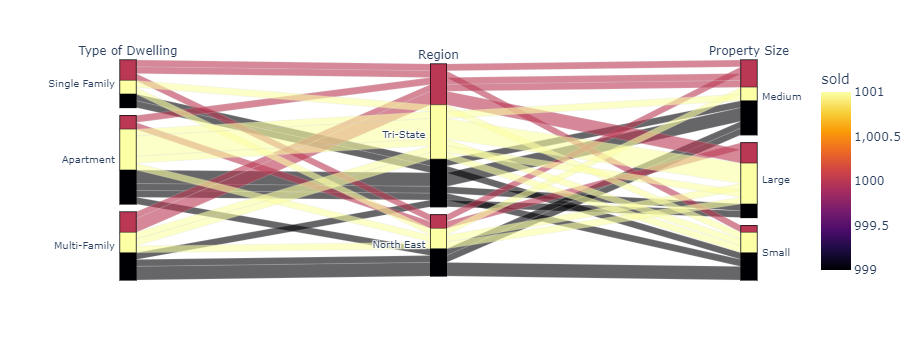

In [110]:
# Plot data using parallel_categories
px.parallel_categories(
    df,
    dimensions=["type", "region", "prop_size"],
    color="sold",
    color_continuous_scale=px.colors.sequential.Inferno,
    labels={
        "type": "Type of Dwelling",
        "region": "Region",
        "prop_size": "Property Size",
    },
)

 ## Student Activity: Categorical Assessment

Every year, real estate properties are assessed for their value. There are key attributes that are considered when evaluating a property, and these include the condition, total number of rooms, number of bedrooms, bathrooms, etc. Use a parallel categories plot to plot these attributes as dimensions. Use the interactive features of parallel category plots to review how each dimension can affect the other.

In [111]:
import pandas as pd
import plotly.express as px
from pathlib import Path

 ### Prep Data

In [134]:
# Read in data
prop_assessments = pd.read_csv(
    Path("activities/2/06-Stu_Categorical_Evaluation/Resources/allegheny_property_assessments.csv"), 
    index_col="LEGAL2", 
    low_memory=False
).sample(50, replace=True)
prop_assessments.head()

LEGAL1  \
LEGAL2                                                                                             
168.10 (OR 22978 SF) ELROND DR                   RIVENDALE PLAN #4 IRREG LOT 77.09X121.34X         
130.16 (.3398 ALD) APPLETREE DR                  ORCHARD HILLS PLAN #1 #102-LOT = 78.42X138.18X    
74 RR COMANCHE RD                                BROOKSIDE FARMS PLAN PT 67 LOT 81.24X179.56X72.   
ELL DR                                           CHURCHILL VALLEY 20TH PLAN 2002 LOT 50X120 NORV   
93 SHADYCREST RD                                 TROPICIAL ACRES PLAN 30 LOT 42.53XAVG175.23X92.   

                                                                                          LEGAL3  \
LEGAL2                                                                                             
168.10 (OR 22978 SF) ELROND DR                   2 STY BRK & ALUM HSE #4                           
130.16 (.3398 ALD) APPLETREE DR                  2 STY BRK V HSE - GAR #2516                       
74 RR COMANCHE RD                                1 1/2 STY BRK V HSE-GAR 3239                      
ELL DR                                           1 STY BRK V HSE 824                               
93 SHADYCREST RD                                 1 STY BRK V BUNG-INT GAR 964                      

                                                NEIGHCODE TAXCODE  \
LEGAL2                                                              
168.10 (OR 22978 SF) ELROND DR                      93401       T   
130.16 (.3398 ALD) APPLETREE DR                     95001       T   
74 RR COMANCHE RD                                   87601       T   
ELL DR                                              93401       T   
93 SHADYCREST RD                                    12002       T   

                                                      TAXDESC  \
LEGAL2                                                          
168.10 (OR 22978 SF) ELROND DR                   20 - Taxable   
130.16 (.3398 ALD) APPLETREE DR                  20 - Taxable   
74 RR COMANCHE RD                                20 - Taxable   
ELL DR                                           20 - Taxable   
93 SHADYCREST RD                                 20 - Taxable   

                                                              OWNERDESC CLASS  \
LEGAL2                                                                          
168.10 (OR 22978 SF) ELROND DR                   REGULAR-ETUX OR ET VIR     R   
130.16 (.3398 ALD) APPLETREE DR                  REGULAR-ETUX OR ET VIR     R   
74 RR COMANCHE RD                                REGULAR-ETUX OR ET VIR     R   
ELL DR                                                          REGULAR     R   
93 SHADYCREST RD                                                REGULAR     R   

                                                   CLASSDESC  USECODE  \
LEGAL2                                                                  
168.10 (OR 22978 SF) ELROND DR                   RESIDENTIAL       10   
130.16 (.3398 ALD) APPLETREE DR                  RESIDENTIAL       10   
74 RR COMANCHE RD                                RESIDENTIAL       10   
ELL DR                                           RESIDENTIAL       10   
93 SHADYCREST RD                                 RESIDENTIAL       10   

                                                       USEDESC  ...  \
LEGAL2                                                          ...   
168.10 (OR 22978 SF) ELROND DR                   SINGLE FAMILY  ...   
130.16 (.3398 ALD) APPLETREE DR                  SINGLE FAMILY  ...   
74 RR COMANCHE RD                                SINGLE FAMILY  ...   
ELL DR                                           SINGLE FAMILY  ...   
93 SHADYCREST RD                                 SINGLE FAMILY  ...   

                                                 CONDITION CONDITIONDESC  \
LEGAL2                                                                     
168.10 (OR 22978 S

 ### Slice Data

In [135]:
# Select list of columns
prop_assessments = prop_assessments[['LOCALTOTAL', 'USEDESC', 'TOTALROOMS', 'BEDROOMS', 'FULLBATHS']]
prop_assessments.rename(columns = {'LOCALTOTAL': "Price"}, inplace = True)
prop_assessments.sort_values(['BEDROOMS', 'TOTALROOMS', 'FULLBATHS'], ascending = True, inplace = True)

In [136]:
# Preview data
prop_assessments.head()

Price        USEDESC  \
LEGAL2                                                                   
MILLERSTOWN RD                                    38500  SINGLE FAMILY   
ST .3767%                                         79000    CONDOMINIUM   
31.98 FIFTH AVE COR S AIKEN AVE 19%              185000    CONDOMINIUM   
X AVG165.62X120 RR DAILEY RD                      92800  SINGLE FAMILY   
93 SHADYCREST RD                                  69300  SINGLE FAMILY   

                                                 TOTALROOMS  BEDROOMS  \
LEGAL2                                                                  
MILLERSTOWN RD                                          3.0       1.0   
ST .3767%                                               3.0       1.0   
31.98 FIFTH AVE COR S AIKEN AVE 19%                     4.0       1.0   
X AVG165.62X120 RR DAILEY RD                            6.0       1.0   
93 SHADYCREST RD                                        5.0       2.0   

                                                 FULLBATHS  
LEGAL2                                                      
MILLERSTOWN RD                                         1.0  
ST .3767%                                              1.0  
31.98 FIFTH AVE COR S AIKEN AVE 19%                    1.0  
X AVG165.62X120 RR DAILEY RD                           2.0  
93 SHADYCREST RD                                       1.0

 ### Plot Data

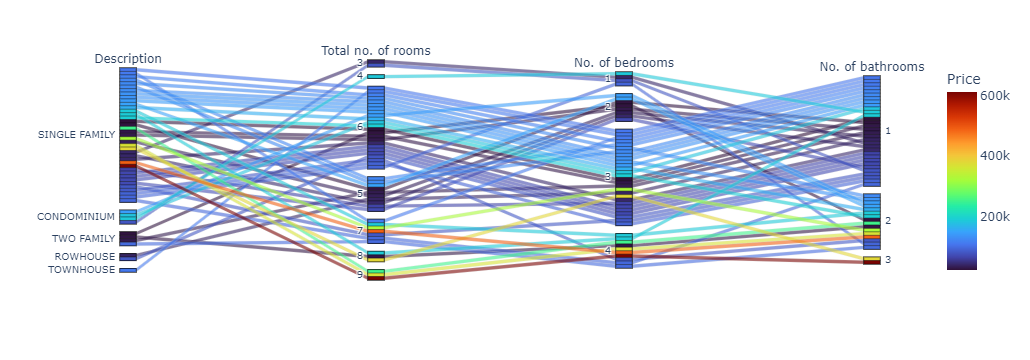

In [140]:
# Plot data
px.parallel_categories(
    prop_assessments,
    dimensions = ['USEDESC', 'TOTALROOMS', 'BEDROOMS', 'FULLBATHS'],
    color = 'Price',
    color_continuous_scale = px.colors.sequential.Turbo,
    labels = {
        "BEDROOMS": "No. of bedrooms",
        "FULLBATHS": "No. of bathrooms",
        "TOTALROOMS": "Total no. of rooms",
        'USEDESC' : "Description"
    }
)



---

# Mapbox

* MapBox API is an open source API that gives developers a range of mapping visualizations and functions that enable the creation of interactive map plots.
* MapBox API is democratizing the map services industry (e.g., navigation and cartography), similar to how Alpaca is doing this for FinTech.
* MapBox offers three main services
    * maps
    * navigation
    * search
* These services come with handy tools, like map styles and vectors, map images and data sets, and live location.
    
![mapbox1](images/mapbox1.png)


## MapBox API and Plotly Express

* Plotly Express has an integration endpoint specific for Mapbox API. This lets Plotly use the Mapbox maps API to create interactive map visualizations. 
* Plotly Express has functions designed specifically for interacting with MapBox

`# Import
import plotly.express as px
mapbox_access_token = 'ADD_YOUR_TOKEN_HERE'
px.set_mapbox_access_token(mapbox_api_token)
`

`# Plot Data
map = px.scatter_mapbox(
filtered_data,
lat="Latitude",
lon="Longitude",
size="PopulationCount",
color="CityName",
zoom=4
)
`

`# Display the map
map.show()
`


* Plotly’s integration with Mapbox makes it extremely convenient to use; **no other imports are required**. All that is needed is the Plotly Express library.


* The Mapbox API uses API keys to monitor API requests. 
* The Mapbox API key needs to be set up as an environment variable. 
* The os.getenv function can then be used to retrieve the key within Python code.

`import plotly.express as px
mapbox_access_token = 'ADD_YOUR_TOKEN_HERE'
px.set_mapbox_access_token(mapbox_api_token)
`

`# Plot Data
map = px.scatter_mapbox(
filtered_data,
lat="Latitude",
lon="Longitude",
size="PopulationCount",
color="CityName",
zoom=4
)
`

`# Display the map
map.show()
`

The scatter_mapbox function in the code baove can be used to create a scatter plot that is overlayed on top of a map (provided by Mapbox). This allows scatter plot data to be analyzed in reference to geographical location.

## Instructor Demo

In [144]:
import plotly.express as px
import pandas as pd
import os
from pathlib import Path
from dotenv import load_dotenv

### Prep Token

In [145]:
# Read the Mapbox API key
load_dotenv()
map_box_api = os.getenv("mapbox")

# Set the Mapbox API
px.set_mapbox_access_token(map_box_api)

### Prep Data

In [152]:
# Read in data
df = pd.read_csv(Path("activities/2/07-Ins_Mapbox_Demo/Resources/population_counts.csv")).drop_duplicates()
data_to_plot = df[["Year", "PopulationCount", "Latitude", "Longitude"]]
filtered_data = df[df["StateDesc"] == "California"]

### Plot data

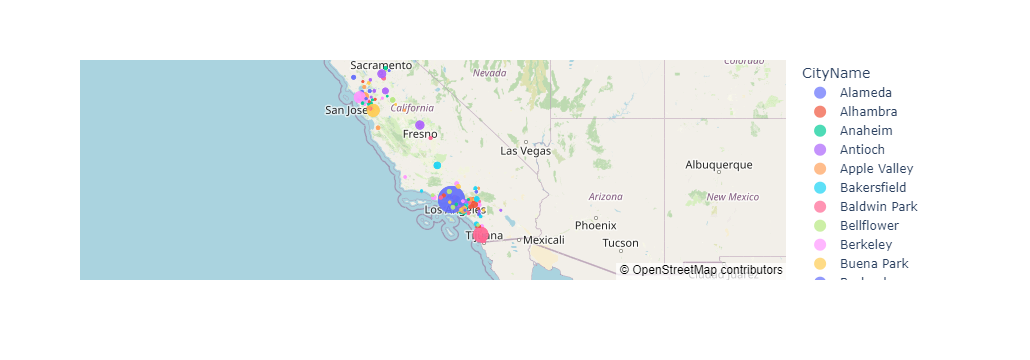

In [155]:
# Plot Data
map_plot = px.scatter_mapbox(
    filtered_data,
    lat="Latitude",
    lon="Longitude",
    size="PopulationCount",
    color="CityName",
    zoom=4,
    mapbox_style = "open-street-map"
)

# Display the map
map_plot.show()

## Student Activity: Mapping Adventures

It's time to plan an expedition for Harold's birthday! All he has told you so far is that he wants to go to NYC. Using the places of interest geospatial data, get a sense of the general location for places of interest. Use this as a guide for determining which boroughs/places you should hit for Harold's birthday adventure!

In [156]:
import pandas as pd
import plotly.express as px
import os
from pathlib import Path
from dotenv import load_dotenv

### Prep Mapbox API Credentials

In [157]:
# Read the Mapbox API key
load_dotenv()
map_box_api = os.getenv("mapbox")

# Set the Mapbox API
px.set_mapbox_access_token(map_box_api)

### Read in data

In [158]:
# Read in data
places_of_interest = pd.read_csv(
    Path("activities/2/08-Stu_Mapping_Adventures/Resources/nyc_places_interest.csv")
).dropna()
places_of_interest.head()

Id  Longitude   Latitude                Name PlaceType Borough
0  90 -73.888958  40.896210  Van Cortlandt Park      Park   Bronx
1  95 -73.871651  40.889879   Woodlawn Cemetery  Cemetery   Bronx
2  81 -73.838642  40.886965    Seton Falls Park      Park   Bronx
3  69 -73.809802  40.877986     Pelham Bay Park      Park   Bronx
4   8 -73.878308  40.864424    Botanical Garden    Garden   Bronx

### Plot Data

#### Plot All Places of Interest

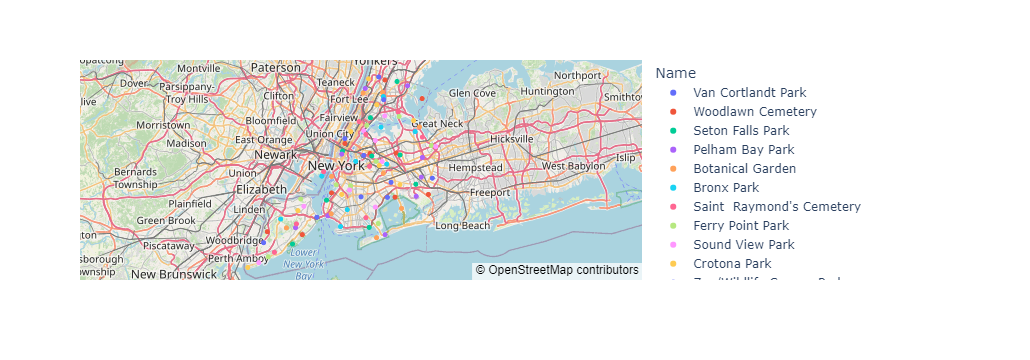

In [169]:
# Slice and plot data by name
map_plot = px.scatter_mapbox(
    places_of_interest,
    lat="Latitude",
    lon="Longitude",
    color="Name",
    zoom=8,
    mapbox_style = "open-street-map"
)
map_plot.show()

#### Plot Places of Interest by Place Type

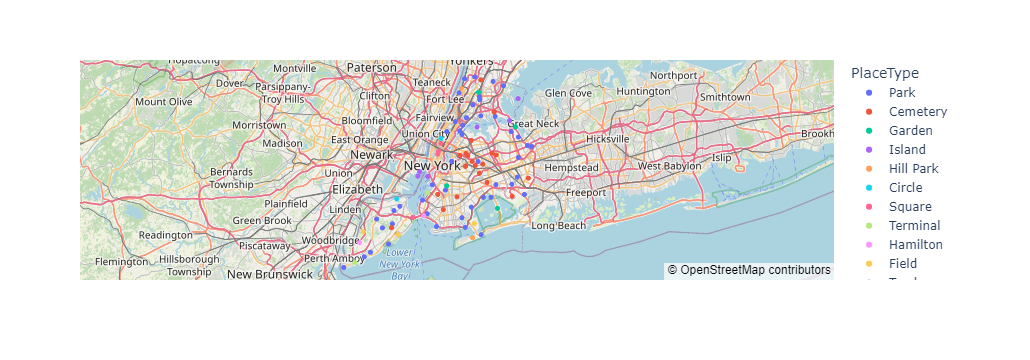

In [170]:
# Slice and plot data by place type

map_plot = px.scatter_mapbox(
    places_of_interest,
    lat="Latitude",
    lon="Longitude",
    color="PlaceType",
    zoom=8,
    mapbox_style = "open-street-map"
)
map_plot.show()


#### Plot Places of Interest by Borough

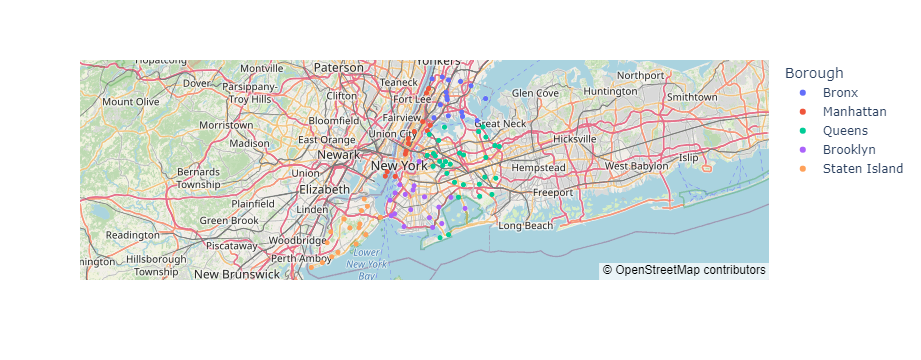

In [194]:
# Slice and plot data by borough 


map_plot = px.scatter_mapbox(
    places_of_interest,
    lat="Latitude",
    lon="Longitude",
    color= "Borough",
    zoom=8,
    mapbox_style = "open-street-map"
)
map_plot.show()



## Student Activity: Challenge

### Mapping Adventures

Creating the initial maps to help plan Harold's birthday was so fun, you've decided to delve a little deeper by also plotting parks, gardens and squares that your travel group may wish to visit. Putting too many map plots in one notebook might create a memory issue, so you've created this notebook to house your second batch of maps.

In [174]:
import pandas as pd
import plotly.express as px
import os
from pathlib import Path
from dotenv import load_dotenv

### Prep Mapbox API Credentials

In [175]:
# Set up API credentials
# Read the Mapbox API key
load_dotenv()
map_box_api = os.getenv("mapbox")

# Set the Mapbox API
px.set_mapbox_access_token(map_box_api)

### Read in data

In [176]:
# Read in data
places_of_interest = pd.read_csv(
    Path("activities/2/08-Stu_Mapping_Adventures/Resources/nyc_places_interest.csv")
).dropna()
places_of_interest.head()

Id  Longitude   Latitude                Name PlaceType Borough
0  90 -73.888958  40.896210  Van Cortlandt Park      Park   Bronx
1  95 -73.871651  40.889879   Woodlawn Cemetery  Cemetery   Bronx
2  81 -73.838642  40.886965    Seton Falls Park      Park   Bronx
3  69 -73.809802  40.877986     Pelham Bay Park      Park   Bronx
4   8 -73.878308  40.864424    Botanical Garden    Garden   Bronx

### Plot Data

#### Plot Parks that are of Interest

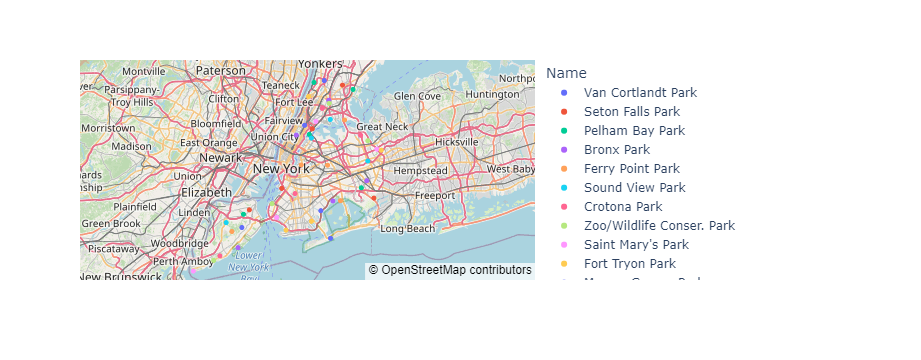

In [195]:
# Slice and plot data by place type of park 
parks_of_interest = places_of_interest.loc[places_of_interest['PlaceType'] == 'Park']

map_plot = px.scatter_mapbox(
    parks_of_interest,
    lat="Latitude",
    lon="Longitude",
    color= "Name",
    zoom=8,
    mapbox_style = "open-street-map"
)
map_plot.show()


#### Plot Gardens of Interest

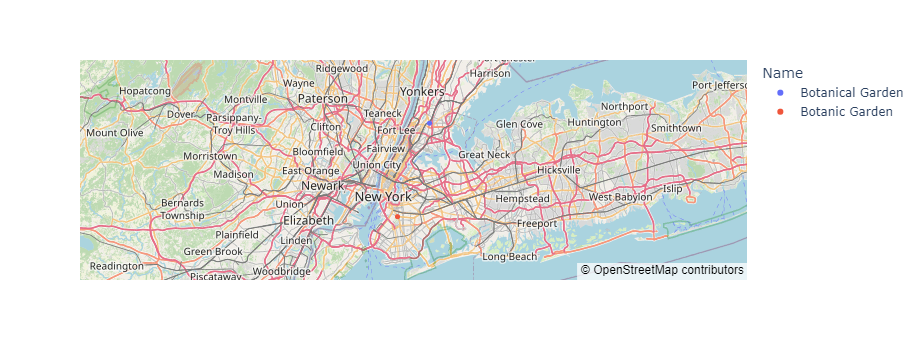

In [198]:
# Slice and plot data by place type of garden 
gardens_of_interest = places_of_interest.loc[places_of_interest['PlaceType'] == 'Garden']

map_plot = px.scatter_mapbox(
    gardens_of_interest,
    lat = "Latitude",
    lon = "Longitude",
    color = "Name",
    zoom = 8,
    mapbox_style = "open-street-map"
)

map_plot.show()

#### Plot Squares of Interest

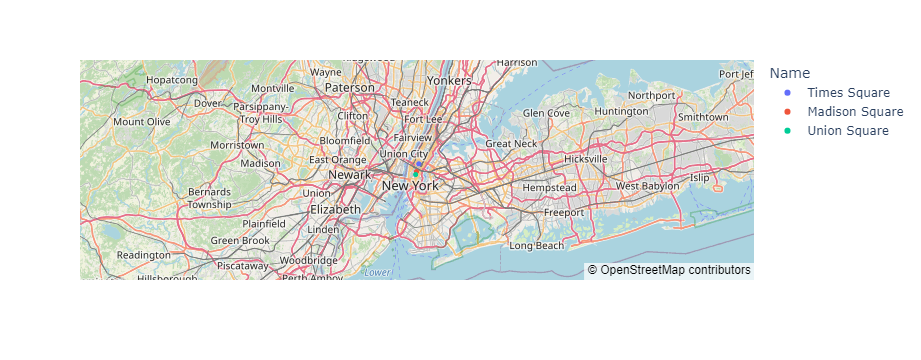

In [230]:
# Slice and plot data by place type of square 
squares_of_interest = places_of_interest.loc[places_of_interest['PlaceType'] == 'Square']

map_plot = px.scatter_mapbox(
    squares_of_interest,
    lat = "Latitude",
    lon = "Longitude",
    color = "Name",
    zoom = 8,
    mapbox_style = "open-street-map"
)

map_plot.show()


## Student: Activity A Cartographers Expedition

Harold wants to have a no-cellphones birthday weekend. This means you have to come up with some way to vet out what locations everyone wants to hit up whie in NYC and plot the routes to each location. Harold wants to use a regular map, but you have something better: Plotly Express Mapbox map plots! 

Don your cartographers hat and create map plots that will pinpoint the location of the places you'll be visitng. Use this as the map/intinerary for Harold's birthday expedition.

In [205]:
import pandas as pd
import plotly.express as px
import os
from pathlib import Path
from dotenv import load_dotenv

### Prep Mapbox API Key

In [206]:
# Read the Mapbox API key
load_dotenv()
map_box_api = os.getenv("mapbox")

# Set the Mapbox API
px.set_mapbox_access_token(map_box_api)

### Prep Data

In [207]:
# Read in data
places_of_interest = pd.read_csv(Path('activities/2/09-Stu_Cartographers_Expedition/Resources/harold_bday_plans.csv')).dropna()
places_of_interest.head()

Id  Longitude   Latitude                Name PlaceType Borough
0  90 -73.888958  40.896210  Van Cortlandt Park      Park   Bronx
1  95 -73.871651  40.889879   Woodlawn Cemetery  Cemetery   Bronx
2  81 -73.838642  40.886965    Seton Falls Park      Park   Bronx
3  69 -73.809802  40.877986     Pelham Bay Park      Park   Bronx
4   8 -73.878308  40.864424    Botanical Garden    Garden   Bronx

In [216]:
places_of_interest.loc[places_of_interest['PlaceType'] == "International Airport"]

Id  Longitude   Latitude                                   Name  \
85  48 -73.785999  40.648068  John F. Kennedy International Airport   

                PlaceType Borough  
85  International Airport  Queens

### Route 1

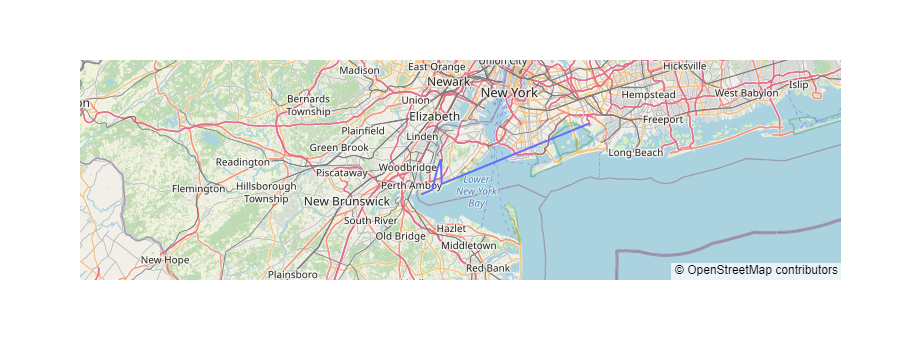

In [237]:
# Plot course for first route

route_1 = pd.concat(
    [places_of_interest.sort_values('Longitude', ascending = True).head(5), places_of_interest.loc[places_of_interest['PlaceType'] == 'International Airport']],
    axis = 0,
    join = 'inner'
)
route_1

px.line_mapbox(
    route_1, 
    lat = "Latitude", 
    lon = "Longitude",
    mapbox_style = 'open-street-map'
)

### Route 2

Figure({
    'data': [{'hovertemplate': 'Name=Astoria Park<br>Latitude=%{lat}<br>Longitude=%{lon}<extra></extra>',
              'lat': array([40.77679234]),
              'legendgroup': 'Astoria Park',
              'lon': array([-73.92426901]),
              'marker': {'color': '#636efa'},
              'mode': 'markers',
              'name': 'Astoria Park',
              'showlegend': True,
              'subplot': 'mapbox',
              'type': 'scattermapbox'},
             {'hovertemplate': 'Name=Aqueduct Race Track<br>Latitude=%{lat}<br>Longitude=%{lon}<extra></extra>',
              'lat': array([40.67219433]),
              'legendgroup': 'Aqueduct Race Track',
              'lon': array([-73.83062352]),
              'marker': {'color': '#EF553B'},
              'mode': 'markers',
              'name': 'Aqueduct Race Track',
              'showlegend': True,
              'subplot': 'mapbox',
              'type': 'scattermapbox'},
             {'hovertemplate': ('Name=John

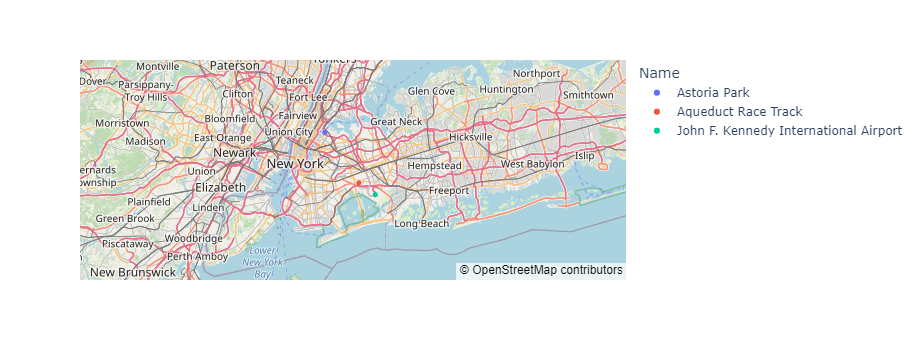

In [256]:
# Plot course for second route
route_2 = places_of_interest[
    (places_of_interest['Name'].str.contains("Airport"))
    | (places_of_interest["Name"].isin(["Aqueduct Race Track", "Astoria Park"]))
]

route_2 = px.scatter_mapbox(route_2,
                           lat = "Latitude",
                           lon = "Longitude",
                           color = "Name",
                            mapbox_style = "open-street-map"
                           )

route_2.show() 

### Route 3

In [ ]:
# Plot course for third route


### All Stops

In [ ]:
# Plot course for all stops
